## **저수율 wafer에 대한 소자, 수율, 계측 data 분석을 통해 원인 추정하고 이에 대한 split 공정 평가 결과 확인 통해 수율 개선 여부 확인**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
! pip install koreanize_matplotlib
import koreanize_matplotlib

In [4]:
df=pd.read_excel('필수과제2_계측데이터.xlsx')

In [5]:
df.head()

,Lot ID,Wafer ID,Yield (%),AVCC (%),LVCC (%),HVCC (%),CA ADI CD (nm),CA ACI CD (nm),Overlay 3sigma (nm),Defect count (ea/mm2),Barrier metal THK (Å),W(Tungsten) deposition temperature (℃),Nitridation plasma power (Watt),Equipment #,Current (nA),Resistance (ohm)
0,T8JYB.1,1,75.270268,11.294384,8.982856,4.452492,40.712446,34.198454,1.1,32.981018,36.5,438.1,400W,MATC01-1,411.195700,157.657064
1,T8JYB.1,7,72.788782,9.142763,13.170905,4.897550,37.785528,31.739843,0.3,21.416057,34.5,437.1,400W,MATC03-1,366.519619,171.867856
2,JQ41J.1,7,75.323854,11.593874,8.171855,4.910417,39.295718,33.794317,0.6,22.899598,35.6,439.1,400W,MATC02-2,381.168461,179.320090
3,BJ5H8.1,8,73.684930,14.258396,8.643197,3.413477,41.217791,35.447301,-0.4,35.852434,34.9,439.6,400W,MATC01-3,453.395705,155.843610
4,K8GIZ.1,4,73.738271,10.853704,11.559729,3.848297,38.703930,33.285380,-2.2,27.681682,36.4,439.0,400W,MATC02-2,383.168904,164.035984


In [6]:
df.shape

(89, 16)

In [7]:
df.isna().sum()

Lot ID                                    0
Wafer ID                                  0
Yield (%)                                 0
AVCC (%)                                  0
LVCC (%)                                  0
HVCC (%)                                  0
CA ADI CD (nm)                            0
CA ACI CD (nm)                            0
Overlay 3sigma (nm)                       0
Defect count (ea/mm2)                     0
Barrier metal THK (Å)                     0
W(Tungsten) deposition temperature (℃)    0
Nitridation plasma power (Watt)           0
Equipment #                               0
Current (nA)                              0
Resistance (ohm)                          0
dtype: int64

In [8]:
df.describe()

,Wafer ID,Yield (%),AVCC (%),LVCC (%),HVCC (%),CA ADI CD (nm),CA ACI CD (nm),Overlay 3sigma (nm),Defect count (ea/mm2),Barrier metal THK (Å),W(Tungsten) deposition temperature (℃),Current (nA),Resistance (ohm)
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,7.505618,72.886773,14.004769,9.042887,4.065571,40.122248,34.150694,-0.329213,29.062826,35.524719,438.357303,497.926683,176.529520
std,4.392979,4.072423,5.002824,2.896747,0.754651,1.671464,1.503817,1.640759,6.251020,0.622729,1.692892,248.937231,22.563384
min,1.000000,61.300000,8.201332,2.404624,2.410335,35.449717,29.777762,-3.000000,13.268280,34.500000,435.200000,357.931751,147.914475
25%,4.000000,70.373809,10.470488,7.295387,3.523454,39.135704,33.225322,-1.800000,24.438363,35.000000,437.000000,395.062175,163.907306
50%,7.000000,73.477764,11.850854,8.126106,4.103307,40.324044,34.159215,-0.500000,29.491605,35.600000,438.100000,415.915644,170.625658
75%,11.000000,75.587338,16.162178,10.954825,4.542385,41.390616,35.182024,1.100000,33.813328,36.100000,439.900000,437.637155,180.939876
max,15.000000,79.300000,31.940226,18.820613,5.810428,43.559831,37.461454,2.500000,43.140135,36.500000,441.500000,1285.326283,267.985215


<Axes: >

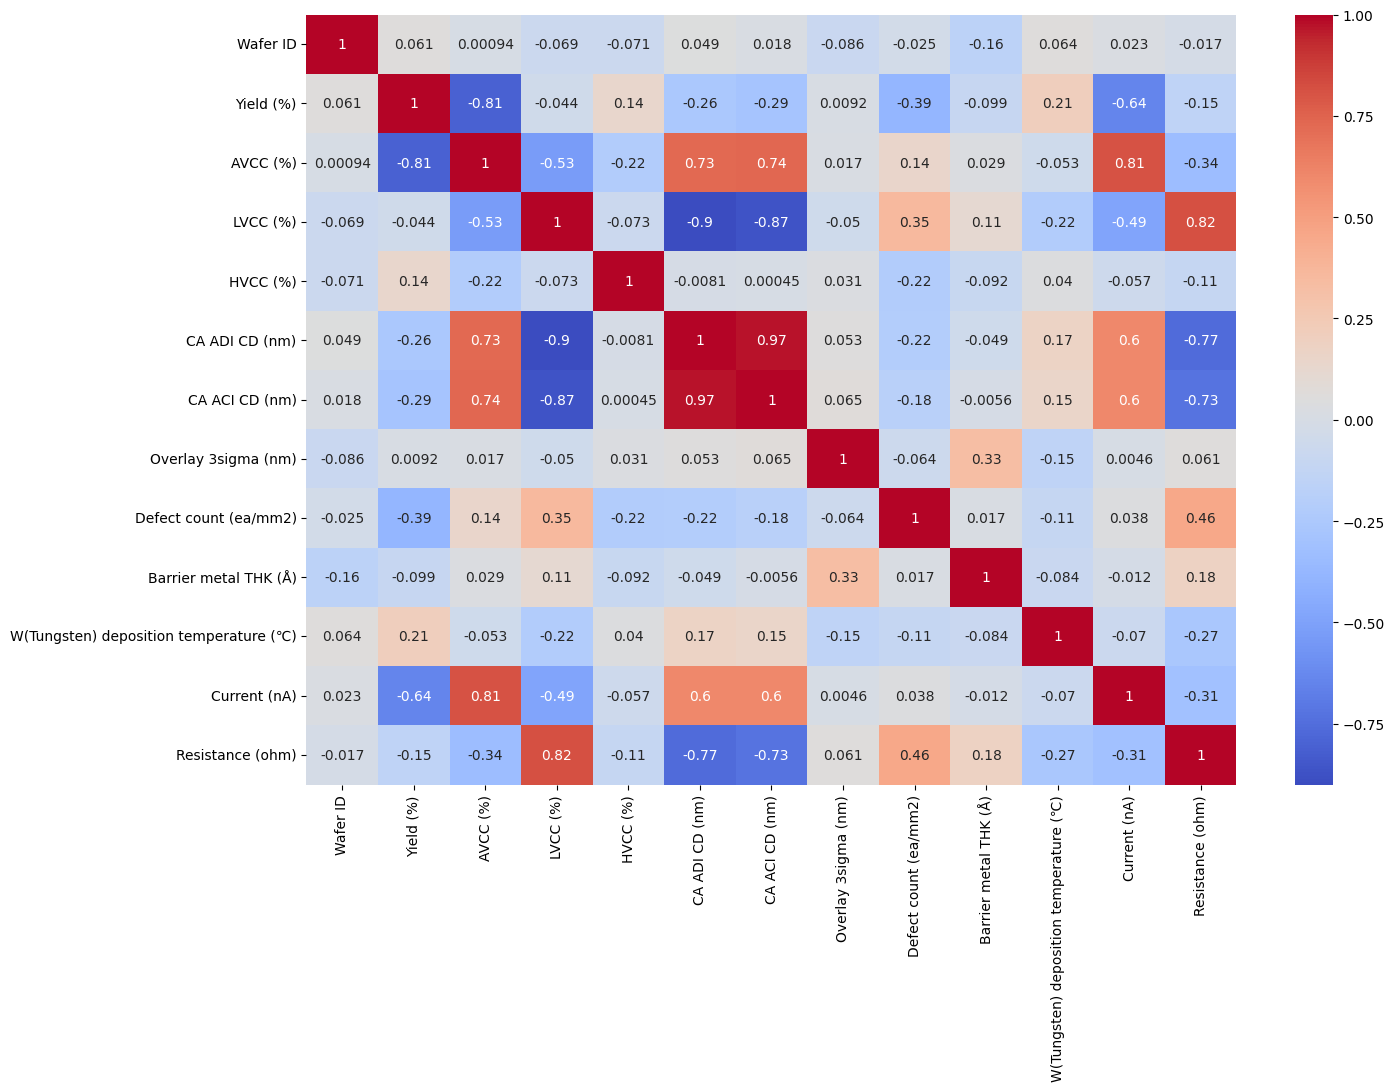

In [12]:
num_cols=df.select_dtypes(exclude='object').columns
cor=df[num_cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True, cmap='coolwarm')

## **저수율 wafer 현상과 관련된 commonality 분석 진행**
### **1) Commonality 분석 - Contact 패터닝 공정의 최종 결과인 ACI CD 값을 기준으로 Yield 항목**

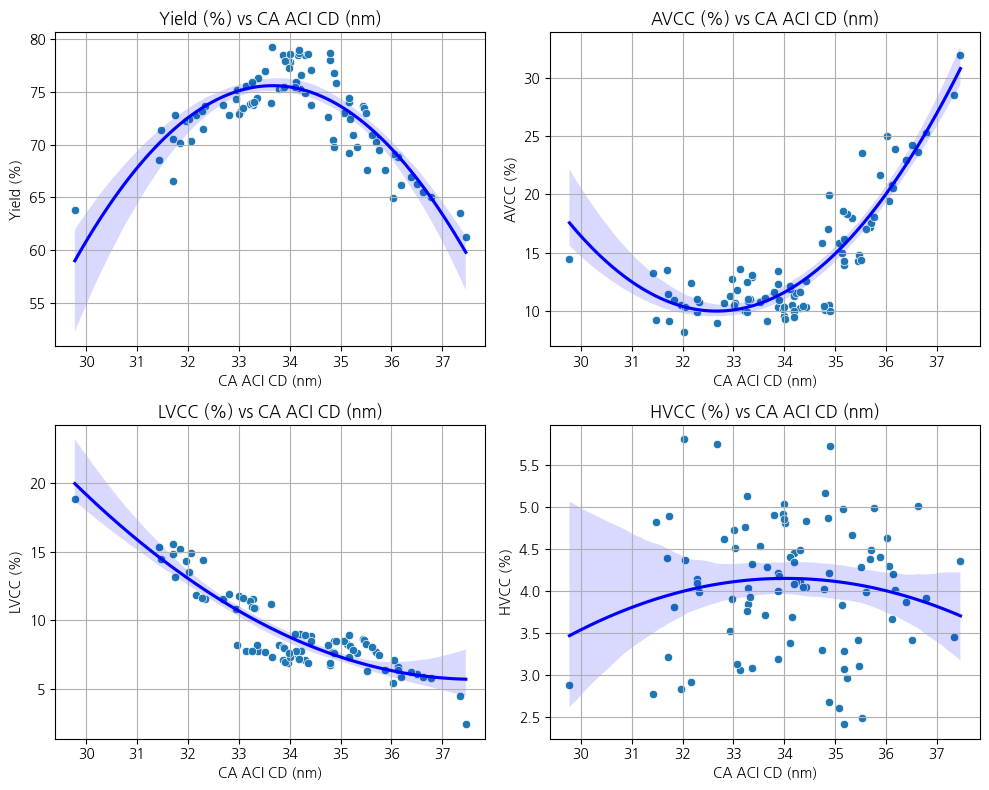

In [49]:
x = 'CA ACI CD (nm)'
y_vars = ['Yield (%)', 'AVCC (%)', 'LVCC (%)', 'HVCC (%)']

plt.figure(figsize=(10, 8))

for i, y in enumerate(y_vars):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=x, y=y)
    sns.regplot(data=df, x=x, y=y, scatter=False, color='blue', order=2)
    plt.title(f'{y} vs {x}')
    plt.grid(True)

plt.tight_layout()
plt.show()


- Contact 패터닝 공정의 최종 결과인 ACI CD 값을 기준으로 수율과의 관계의 상관 관계 확인
- ACI CD에 산포가 있으며, 작거나 클수록 수율이 감소하는 경향이 있음
- cd가 클수록 avcc(회로 부분의 전압 안정성을 나타내는 지표)가 증가
- **칩이 더 높은 전압에서 안정적으로 작동한다는 것으로 보임**
- ACI CD가 클 때 저전압 관련 항목인 LVCC 값도 증가, hvcc는 cd와 상관 관계가 없어 크게 영향없는 것 확인
- ACI CD가 작을 경우, 저전압 동작에서 수율이 떨어지는 문제가 발생
- **ACI CD가 32에서 35 사이일 때 최적의 수율로 보임**

### **2) Commonality 분석 -Contact etch 후 Defect 검사에서 잔여물 (residue) 가 검출된 count 수와 Yield 항목**

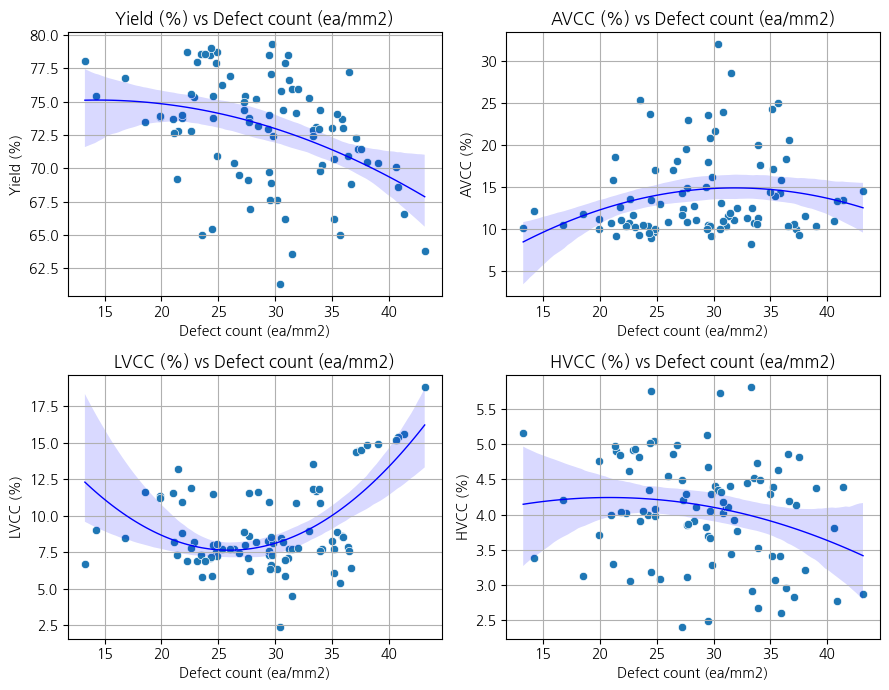

In [51]:


x = 'Defect count (ea/mm2)'
y_vars = ['Yield (%)', 'AVCC (%)', 'LVCC (%)', 'HVCC (%)']

plt.figure(figsize=(9, 7))

for i, y in enumerate(y_vars):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=x, y=y)
    sns.regplot(data=df, x=x, y=y, scatter=False, color='blue', order=2, line_kws={"linewidth": 1})
    plt.title(f'{y} vs {x}')
    plt.grid(True)

plt.tight_layout()
plt.show()



- contact etch 후 Defect 검사에서 잔여물(residue)가 검출된 count 수와 수율과의 상관 관계 확인
- lvcc 빈도가 높을 수록 Defect count 가 큰 경향 확인
- 저전압 상태에서 성능 문제(LVCC 값이 높아지는 현상)가 발생할 때, 공정에서 더 많은 결함이 발생할 수 있음

### 3)**Commonality 분석 - Barrier metal 설비 호기와 Yield 항목과의 관계**

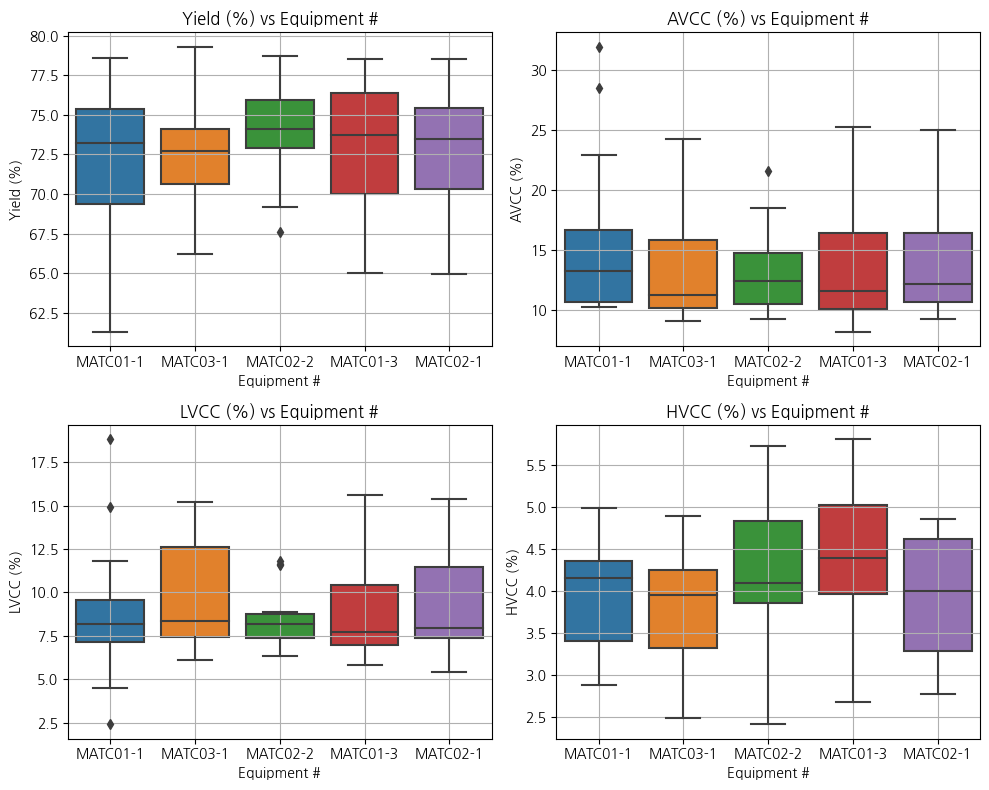

In [52]:
x = 'Equipment #'
y_vars = ['Yield (%)', 'AVCC (%)', 'LVCC (%)', 'HVCC (%)']

plt.figure(figsize=(10, 8))

for i, y in enumerate(y_vars):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f'{y} vs {x}')
    plt.grid(True)

plt.tight_layout()
plt.show()

### 4) Barrier metal 두께와 Yield 항목과의 관계

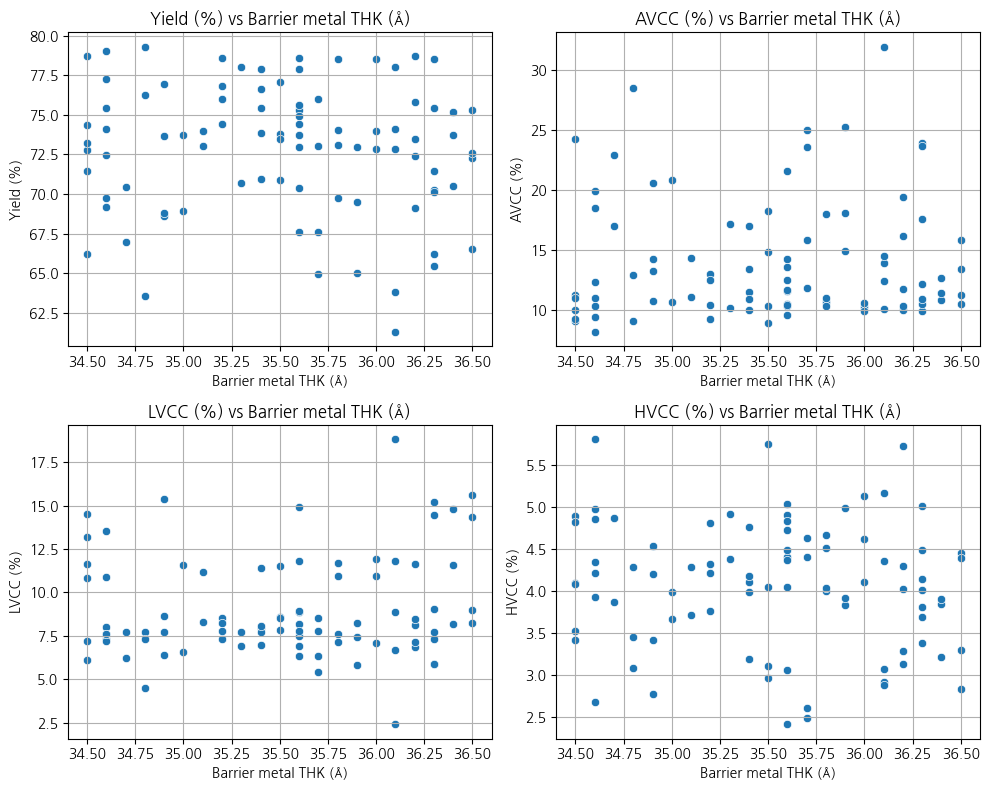

In [10]:
x = 'Barrier metal THK (Å)'
y_vars = ['Yield (%)', 'AVCC (%)', 'LVCC (%)', 'HVCC (%)']

plt.figure(figsize=(10, 8))

for i, y in enumerate(y_vars):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{y} vs {x}')
    plt.grid(True)

plt.tight_layout()
plt.show()

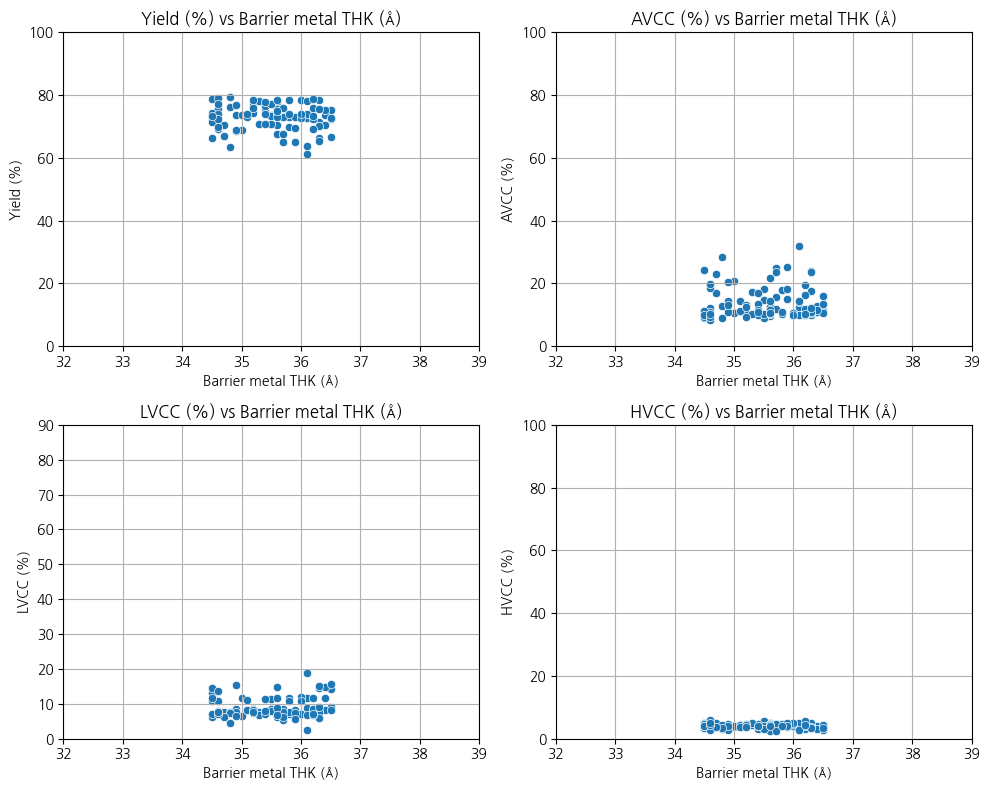

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


x = 'Barrier metal THK (Å)'
y_vars = ['Yield (%)', 'AVCC (%)', 'LVCC (%)', 'HVCC (%)']
y_lims = [(0, 100), (0, 100), (0, 90),(0,100)]  

plt.figure(figsize=(10, 8))

for i, y in enumerate(y_vars):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=x, y=y)
    plt.xlim(32, 39)           
    plt.ylim(y_lims[i])       
    plt.title(f'{y} vs {x}')
    plt.grid(True)

plt.tight_layout()
plt.show()

- Barrier metal 두께와 수율과의 관계성 없는 것으로 확인
- 그 외에 W (Tungsten)deposiion 온도, 플라즈마 설비 power 의 경우도 수율과 관련성 없는 것을 확인

In [39]:
df.columns

Index(['Lot ID', 'Wafer ID', 'Yield (%)', 'AVCC (%)', 'LVCC (%)', 'HVCC (%)',
       'CA ADI CD (nm)', 'CA ACI CD (nm)', 'Overlay 3sigma (nm)',
       'Defect count (ea/mm2)', 'Barrier metal THK (Å)',
       'W(Tungsten) deposition temperature (℃)',
       'Nitridation plasma power (Watt)', 'Equipment #', 'Current (nA)',
       'Resistance (ohm)'],
      dtype='object')

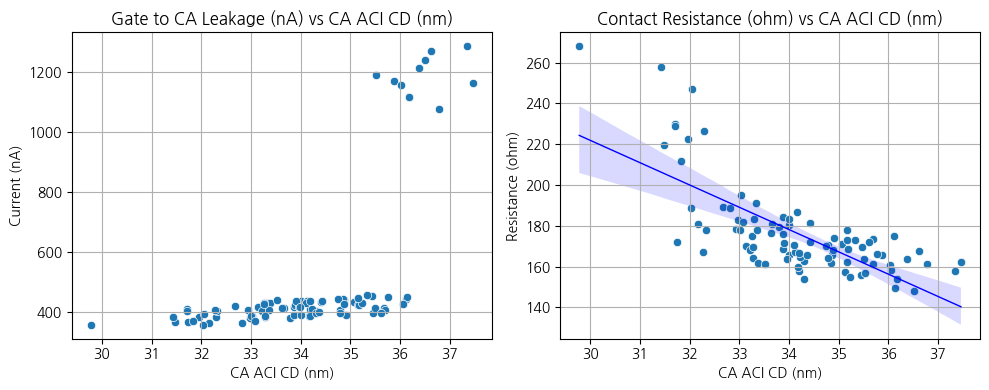

In [57]:


x = 'CA ACI CD (nm)'           
y1 = 'Current (nA)'     
y2 = 'Resistance (ohm)'  


plt.figure(figsize=(10, 4))

# 첫 번째 그래프: Gate to CA Leakage vs CA ACI CD
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x=x, y=y1)
plt.title('Gate to CA Leakage (nA) vs CA ACI CD (nm)')
plt.grid(True)

# 두 번째 그래프: Contact Resistance vs CA ACI CD
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x=x, y=y2)
sns.regplot(data=df, x=x, y=y2, scatter=False, color='blue', line_kws={"linewidth": 1})
# R² 값 계산 및 표시
#slope, intercept, r_value, p_value, std_err = linregress(df[x], df[y2])
#plt.text(0.05, 0.85, f'$R^2$ = {r_value**2:.4f}', transform=plt.gca().transAxes)
plt.title('Contact Resistance (ohm) vs CA ACI CD (nm)')
plt.grid(True)

plt.tight_layout()
plt.show()


- aci cd 가 큰 경우 급격하게 leakage 값이 증가하는 경향을 확인
- aci cd 가 작아질 수록 contact resistance 가 증가하는 경향 확인

# Split 평가 결과 중간 정리

In [59]:
df2=pd.read_excel('필수과제2_평가데이터.xlsx')
df2.head()

,Lot ID,Wafer ID,평가 Concept,Yield (%),AVCC (%),LVCC (%),HVCC (%),CA ADI CD (nm),CA ACI CD (nm),Overlay 3sigma (nm),Current (nA),Resistance (ohm)
0,KZTWK.1,4,Reference,66.05,26.80,5.43,1.72,41.969217,36.641014,2.5,1562.3,130.091014
1,KZTWY.1,10,Reference,66.64,24.45,6.54,2.37,42.337234,36.046532,2.5,1487.5,132.236486
2,KZTWJ.1,5,Reference,70.02,21.48,5.21,3.29,41.494259,35.651032,0.2,237.0,134.638458
3,KZTWK.1,11,Reference,68.45,20.37,8.57,2.61,41.106086,35.624864,-2.9,244.8,132.866004
4,KZTWP.1,10,Reference,71.69,19.18,7.32,1.81,40.711277,35.592731,-0.2,138.5,138.605080


In [60]:
df2.isna().sum()

Lot ID                 0
Wafer ID               0
평가 Concept             0
Yield (%)              0
AVCC (%)               0
LVCC (%)               0
HVCC (%)               0
CA ADI CD (nm)         0
CA ACI CD (nm)         0
Overlay 3sigma (nm)    0
Current (nA)           0
Resistance (ohm)       0
dtype: int64

In [63]:
df2.describe(include='object')

,Lot ID,평가 Concept
count,120,120
unique,8,2
top,KZTWK.1,Reference
freq,15,60


In [70]:
df2.columns

Index(['Lot ID', 'Wafer ID', '평가 Concept', 'Yield (%)', 'AVCC (%)', 'LVCC (%)',
       'HVCC (%)', 'CA ADI CD (nm)', 'CA ACI CD (nm)', 'Overlay 3sigma (nm)',
       'Current (nA)', 'Resistance (ohm)'],
      dtype='object')

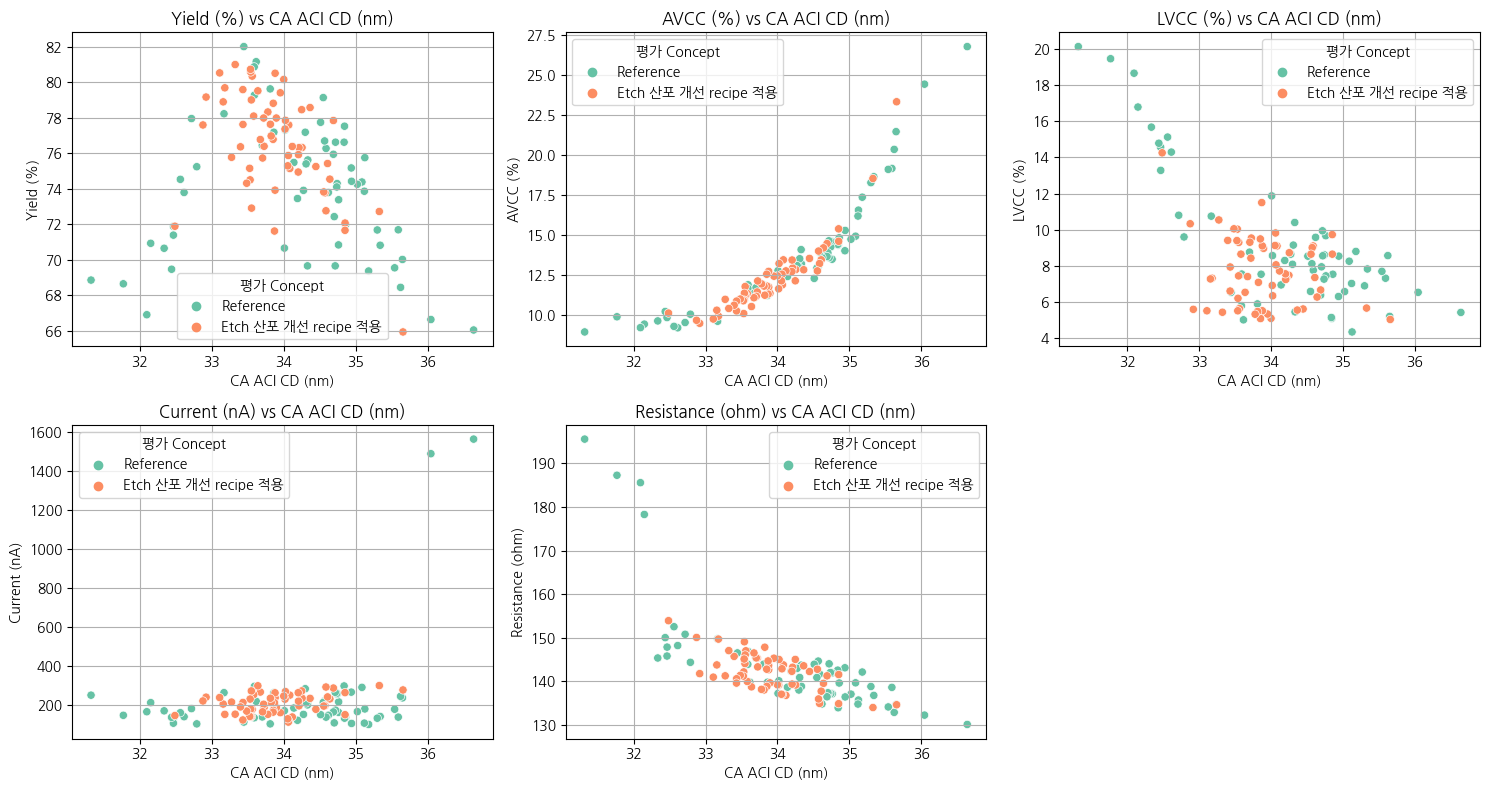

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

x = 'CA ACI CD (nm)'
y_vars = ['Yield (%)', 'AVCC (%)', 'LVCC (%)', 'Current (nA)', 'Resistance (ohm)']
hue = '평가 Concept'

plt.figure(figsize=(15, 8))  

for i, y in enumerate(y_vars):
    plt.subplot(2, 3, i + 1) 
    sns.scatterplot(data=df2, x=x, y=y, hue=hue, palette='Set2')
    plt.title(f'{y} vs {x}')
    plt.grid(True)

plt.tight_layout()
plt.show()



In [77]:
df3=pd.read_excel('필수과제2_평가데이터2.xlsx')
df3.head()

,Lot ID,Wafer ID,평가 concept,Yield (%),AVCC (%),LVCC (%),HVCC (%),CA ADI CD (nm),CA ACI CD (nm),Overlay 3sigma (nm),Defect count (ea/mm2),Barrier metal THK (Å),W(Tungsten) deposition temperature (℃),Nitridation plasma power (Watt),Equipment #,Current (nA),Resistance (ohm)
0,KZSBY.1,1,Reference,74.685855,11.258995,9.7,4.355150,39.8,34.1,1.4,30.3,35.5,438.1,400W,MATC01-1,417.477204,169.525806
1,KZSBY.1,2,Reference,72.865017,13.054983,9.9,4.180000,40.1,34.3,-2.3,33.0,36.3,440.0,400W,MATC02-2,387.780000,172.939355
2,KZSBY.1,3,Contact Photo ET -1mJ,67.811062,12.720684,14.8,4.668254,37.5,31.5,-0.5,27.8,35.0,436.2,400W,MATC01-3,435.210000,240.540000
3,KZSBY.1,4,Contact Photo ET -1mJ,69.096087,11.593874,15.1,4.210038,37.8,31.8,-0.9,31.0,36.1,438.4,400W,MATC01-1,406.831171,238.970000
4,KZSBY.1,5,Etch 후 세정 HF time +10s,76.235487,12.400000,6.5,4.864513,40.1,34.4,0.0,27.4,35.2,435.6,400W,MATC02-2,387.909257,177.747541


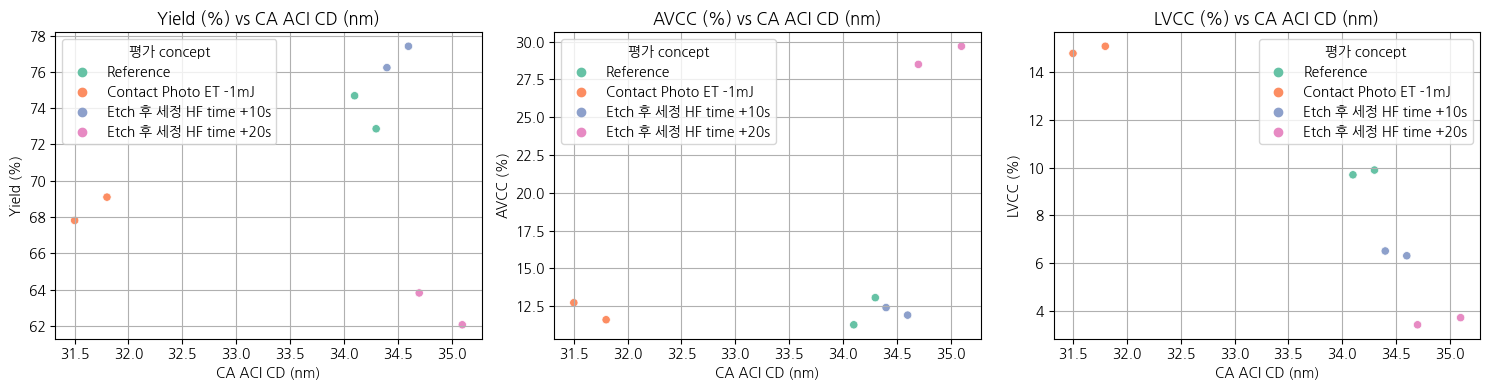

In [79]:

# 그래프를 그릴 데이터 칼럼
x = 'CA ACI CD (nm)'
y_vars = ['Yield (%)', 'AVCC (%)', 'LVCC (%)']
hue = '평가 concept'

plt.figure(figsize=(15, 4))

for i, y in enumerate(y_vars):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df3, x=x, y=y, hue=hue, palette='Set2')
    plt.title(f'{y} vs {x}')
    plt.grid(True)

plt.tight_layout()
plt.show()